<a href="https://colab.research.google.com/github/sharonwanjiru/NLPProject/blob/main/NLPProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
import csv
from google.colab import drive
from wordcloud import WordCloud, STOPWORDS #for the word clouds
import re
import nltk
import string
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Uploading dataset**

In [26]:
upload = "/content/gdrive/MyDrive/PainMedicationRecommendation/drugsComTrain_raw.csv"

**All medication head**

In [27]:
#data = pd.read_csv(io.BytesIO(upload['drugsComTrain_raw.csv']))
data = pd.read_csv((upload))
# checking the data head
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [28]:
data.shape


(161297, 7)

Pain Medication head

In [29]:
painMedication = data[data.condition == 'Pain']
painMedication.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
32,204999,Toradol,Pain,"""I am 30 years old. I had a multiple composite...",10,11-Feb-13,16
37,93678,Morphine,Pain,"""I have been on morphine for at least 7 years....",8,8-May-10,19
52,69629,Buprenorphine,Pain,"""My pain management doctor put me on Butrans p...",8,24-Jun-11,125
62,69488,Buprenorphine,Pain,"""I love my Butrans patch!!! And it has relieve...",10,6-Aug-15,47
108,57623,Acetaminophen / hydrocodone,Pain,"""I suffer from chronic pain due to severe arth...",8,6-Dec-16,3


In [30]:
painMedication.shape

(6145, 7)

**DATA EXPLORATION**

*Unique data features*:

In [31]:
print("Number of unique drugs in the Dataset :", data['drugName'].nunique())
print("Number of unique conditions present in the Dataset :", data['condition'].nunique())
print("...................................................... :")
data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(5)
#data('condition')['drugName'].nunique().sort_values(ascending=False).head(5)
print("The number of pain drugs reviews :" ,data.condition.value_counts().Pain)
print("Number of Unique pain Drugs present in the Dataset :", painMedication['drugName'].nunique())
print("Number of unique attributes in the pain ailment :", painMedication.nunique())



Number of unique drugs in the Dataset : 3436
Number of unique conditions present in the Dataset : 884
...................................................... :
The number of pain drugs reviews : 6145
Number of Unique pain Drugs present in the Dataset : 200
Number of unique attributes in the pain ailment : uniqueID       6145
drugName        200
condition         1
review         4448
rating           10
date           2402
usefulCount     217
dtype: int64


**Summary of the dataset**

In [32]:
data[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [33]:
painMedication[['rating','usefulCount']].describe()

,rating,usefulCount
count,6145.000000,6145.000000
mean,7.632221,35.574451
std,2.928199,41.951497
min,1.000000,0.000000
25%,7.000000,12.000000
50%,9.000000,23.000000
75%,10.000000,44.000000
max,10.000000,485.000000


In [34]:
painMedication.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6145 entries, 32 to 161256
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     6145 non-null   int64 
 1   drugName     6145 non-null   object
 2   condition    6145 non-null   object
 3   review       6145 non-null   object
 4   rating       6145 non-null   int64 
 5   date         6145 non-null   object
 6   usefulCount  6145 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 384.1+ KB


In [35]:
painMedication.isnull().any()

uniqueID       False
drugName       False
condition      False
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [36]:
#Chck for null values
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [37]:
#Drop all the null values
data = data.dropna()
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

***Graph plot of top condition***

Text(0.5, 1.0, 'The number of drugs top 5 conditions')

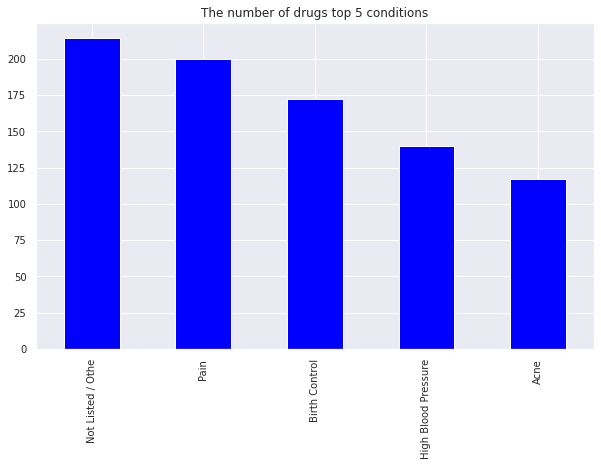

In [38]:
condition_top = data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_top[0:5].plot(kind="bar", figsize = (10,6), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 12)
plt.ylabel("", fontsize = 12)
plt.title("The number of drugs top 5 conditions", fontsize = 12)

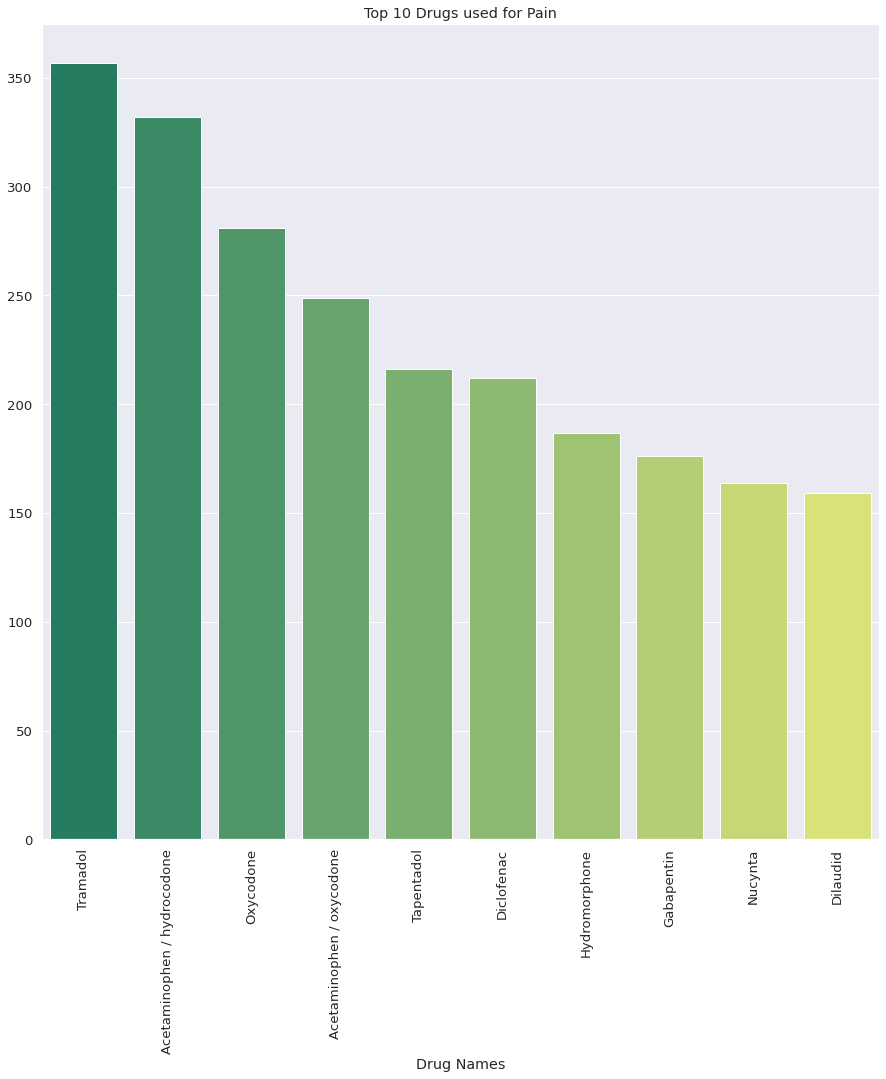

In [39]:
# Top 10 drugs which are used for pain 
df1 = data[data['condition'] == 'Pain']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 90);

In [40]:
data['review'][1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

***Data cleaning***

In [41]:
#Puntuation Removal for the whole dataset
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal)

In [42]:
# Puntuation Removal for pain medication
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

painMedication['review'] = painMedication['review'].apply(punctuation_removal)

In [47]:
# Removing Numbers for the whole dqataset

def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review'] = data['review'].apply(drop_numbers)

In [44]:
#  remove the Numbers also
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

painMedication['review'] = painMedication['review'].apply(drop_numbers)

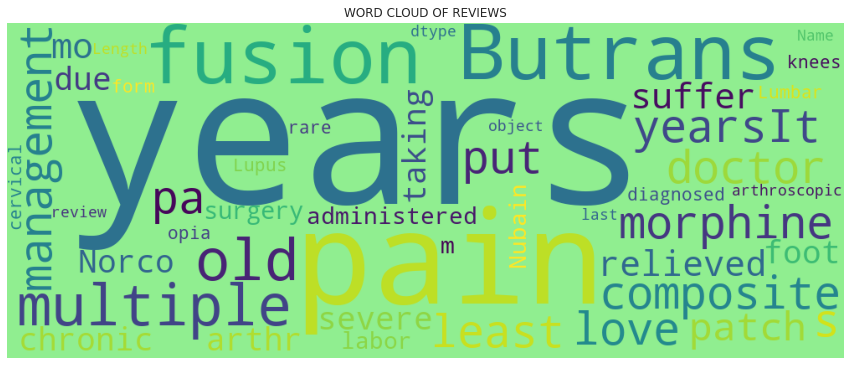

In [45]:
# word could for the pain medication reviews

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1000, height = 400).generate(str(painMedication['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 12)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

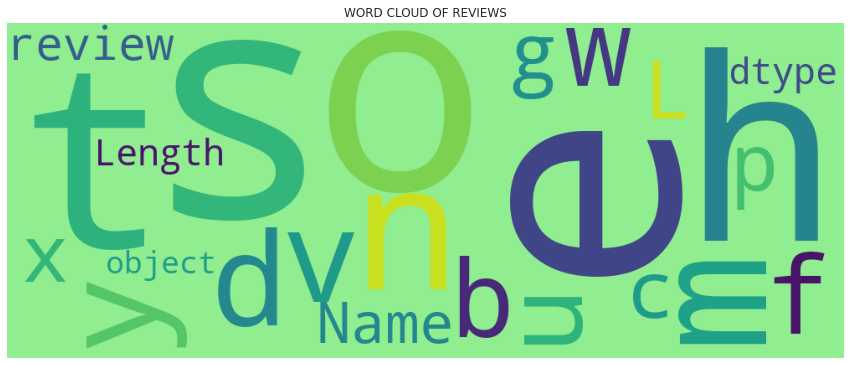

In [46]:
# word cloud for data reviews
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1000, height = 400).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 12)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

MODEL